# Imports

Dieses Notebook enthält unterschiedliche Feature selection Teile.

In [10]:
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

pd.options.display.precision = 10

# CatBoost

## CatBoost _ 46 Features

In [26]:
feature_importances = m.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

skew: 6.956353024194814
mean: 6.310241034648395
zero_crossings: 5.623567322885117
min: 5.131646774109507
max: 4.675742164711834
rms_kurt: 4.568926431731883
spec_cent_75%q: 4.247758642230181
spec_cent_max: 4.190178784627712
kurt: 4.0064199945053645
absMax: 3.9460600174417597
rms_skew: 3.85348703664952
spec_cent_min: 3.6934909243271754
spec_cent_99%q: 3.2906090443130447
spec_cent_95%q: 3.127583383114546
spec_cent_kurt: 2.881897914136412
rms_std: 2.8585371426252313
spec_cent_skew: 2.7592601102982806
spec_cent_1%q: 2.3981813233520315
absMean: 2.2081091681679137
spec_cent_25%q: 2.1917590233766946
spec_cent_5%q: 2.187149344091493
spec_cent_std: 2.088807628580568
spec_cent_mean: 1.7825498327962848
rms_25%q: 1.6886142654225265
rms_5%q: 1.6533318151592
rms_min: 1.349751043103175
rms_1%q: 1.2869792383771024
rms_75%q: 1.162142790714365
std: 1.1610925545115878
absStd: 1.1431570565375115
rms_95%q: 1.0517503333680798
rms_mean: 0.986889097389073
rms_max: 0.8021959148026183
rms_99%q: 0.744350617275997

### Feature Importances CatBoost 92 Features


In [170]:
feature_importances = m.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

skew: 3.7327485058842353
zero_crossings: 2.6910612666765195
chroma_stft_95%q: 2.492919097851608
chroma_stft_max: 2.433370716668
spec_bw_max: 2.309247317085658
chroma_stft_75%q: 2.2380370796342484
mfcc_kurt: 2.212971303619402
chroma_stft_99%q: 2.2002330843379094
mfcc_skew: 2.167079335930965
rms_kurt: 2.1335816699215036
min: 2.0465433937015933
chroma_stft_25%q: 2.0404246925114564
spec_cent_max: 2.024123956689253
spec_bw_99%q: 1.9896295759118838
rms_skew: 1.9504872156983881
kurt: 1.9240578966757738
max: 1.8776868053134221
chroma_stft_mean: 1.7746410969446156
chroma_stft_skew: 1.7474203251129428
spec_cent_75%q: 1.7346653567125268
absMax: 1.7147830785704512
spec_bw_95%q: 1.6481040240890352
spec_cent_95%q: 1.632193162272066
chroma_stft_kurt: 1.6308604302491063
chroma_stft_cent_5%q: 1.6195931150780902
mfcc_min: 1.5905301411387578
mfcc_max: 1.5582226588007155
spec_bw_75%q: 1.5080148235854145
rolloff_min: 1.4766048108376157
chroma_stft_1%q: 1.410350911652337
rms_std: 1.3869328563784704
spec_cen

## GradientBoost

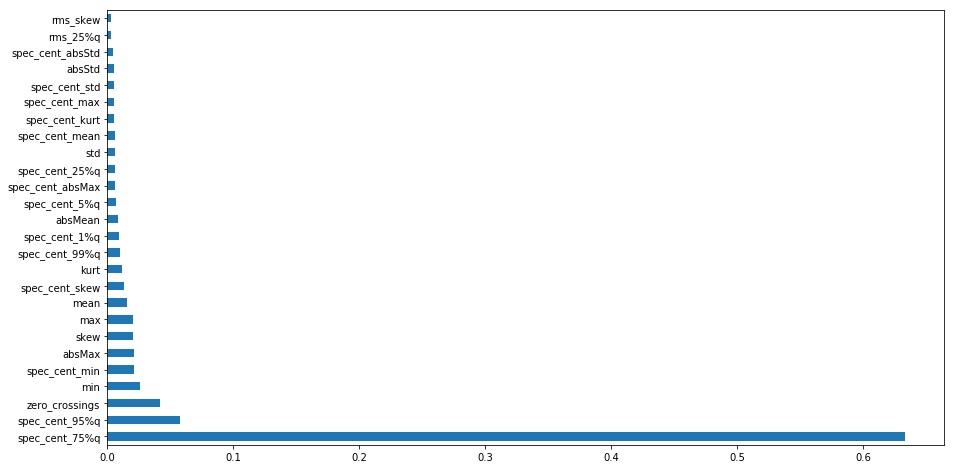

In [36]:
(pd.Series(grid.best_estimator_.named_steps['regressor'].feature_importances_, index=X_train.columns)
   .nlargest(26)
   .plot(kind='barh',figsize=(15, 8))) 
#quelle: https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

# PCA dimensionality reduction

## Umgebungsvariablen

In [3]:
#feature generated 24.03.2019
earthquake_daten = '''C:/Users/taacodo4/GITRepos/CAS_PML_Earthquake_pred/data/'''
#earthquake_daten = '''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/'''
feature_62900_94 = 'Features_62900-94.csv'
feature_41934_94 = 'Features_41934_94.csv'
Features_4194_94 = 'Features_4194_94.csv'

## Feature laden

In [7]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

## PCA decomposition

In [8]:
X = feature_data
pca = PCA(n_components=20)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[8.52705821e-01 9.58549116e-02 2.90582650e-02 9.29929939e-03
 5.78655377e-03 2.00423455e-03 1.52929293e-03 8.43931036e-04
 7.96014617e-04 4.85758394e-04 3.72315766e-04 3.24307000e-04
 2.88007907e-04 1.48272860e-04 1.09891221e-04 1.03972262e-04
 8.34802766e-05 4.54612670e-05 3.44998236e-05 2.85704366e-05]
[79515260.49877508 26659871.85554378 14678636.38702668  8303782.92063546
  6550295.13973427  3855006.76575254  3367411.66985017  2501522.14200958
  2429469.17690809  1897846.26346181  1661523.87267225  1550704.45129802
  1461346.076807    1048532.03629571   902676.9897155    878030.53246248
   786760.97839939   580592.79207787   505777.27191378   460266.4407739 ]


In [26]:
pca = PCA(n_components=20)
pca.fit(X)
features_PCA=pca.transform(X) 

## Store dimension reduced data set

In [27]:
features_PCA=pd.DataFrame(features_PCA)

In [28]:
features_PCA.to_csv(earthquake_daten+'Features_PCA_20.csv')

In [30]:
features_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-181972.1853794308,-36394.4330613614,171797.4110913957,34215.6471338381,-16537.1427292294,-25374.3358475975,-9163.4684621953,-973.5793706044,436.5975131236,-5306.7119861762,-7561.8837686360,-8861.3086886483,435.1073150531,2599.5293264597,5827.3065790978,3899.7353809885,844.6447900626,3173.9729980851,581.2348830360,-1849.4742178128
1,32038.3753533388,-202095.5031528999,139289.5299211791,64373.9133703959,1535.9736276593,-34176.0585049977,-21203.8189938500,7278.2682088342,-16701.2324171912,1718.9346804158,-6044.9629427035,-7500.5319545162,-3672.3887329261,-1123.5655536854,3165.8767853318,2800.2756968933,4399.6977812728,-275.3775521937,920.6525028753,-2914.7814367958
2,25667.4929448198,-182281.7878288151,144853.2288013907,54935.6898090541,1447.0919139677,-29844.8868954802,-11506.0408995832,5446.0308954168,-26210.9237662784,915.2516619176,-6561.7496088643,-10574.2543327356,-5109.5128560110,-4351.6538986543,1224.2467228688,3290.0466044985,2546.5951971767,-2463.1167409446,2659.2812237225,-253.5059425272
3,-36024.5929071542,-159717.6077189532,206702.1214032233,40980.5964933686,-4080.2999216007,-33193.6078340895,-25126.0092570235,3896.1132328577,-21692.3131856223,2750.2677843304,-5320.3337029861,-7871.3474418265,-5032.7298388222,5632.0350853996,3024.7730232733,3248.3538846192,-484.8656966210,-243.1747067263,1671.6518074349,-463.8872388748
4,160130.7931162382,-167169.2179537113,50782.7070804358,84391.9080612415,971.3349438410,-15930.9713005078,-12440.7454561887,8432.0139615597,-10442.1547949744,1505.7788509406,-3935.1399515704,-5361.3998252004,21807.1105677856,-5947.1028865481,6713.8148199810,2314.7725357341,1284.6035750450,1419.5036439726,1250.3087708477,-1077.8288501696


In [31]:
features_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41934 entries, 0 to 41933
Data columns (total 20 columns):
0     41934 non-null float64
1     41934 non-null float64
2     41934 non-null float64
3     41934 non-null float64
4     41934 non-null float64
5     41934 non-null float64
6     41934 non-null float64
7     41934 non-null float64
8     41934 non-null float64
9     41934 non-null float64
10    41934 non-null float64
11    41934 non-null float64
12    41934 non-null float64
13    41934 non-null float64
14    41934 non-null float64
15    41934 non-null float64
16    41934 non-null float64
17    41934 non-null float64
18    41934 non-null float64
19    41934 non-null float64
dtypes: float64(20)
memory usage: 6.4 MB
